In [4]:
# selection sort (very slow)
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [6]:
x = np.array([2, 1, 4, 3, 5])
%timeit np.sort(x)

The slowest run took 9.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.31 µs per loop


In [8]:
%timeit x.sort

The slowest run took 30.37 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 91.5 ns per loop


In [12]:
# indices are stored as arguments
i = np.argsort(x)
print(i)

# use fancy indexing to construct the sorted array
x[i]

[1 0 3 2 4]


array([1, 2, 3, 4, 5])

In [4]:
import numpy as np
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [8]:
# sort each column 
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [9]:
# sort each row
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [14]:
# partitioning an array
x = np.array([7, 2, 3, 1, 6, 5, 4])
# three smallest values are on the left, but the output is not ordered
np.partition(x, 3) 

array([2, 1, 3, 4, 6, 5, 7])

In [15]:
# partion the first two slots in each roww
np.partition(X, 2, axis=1) 

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

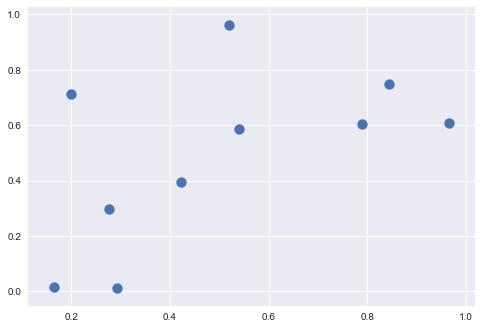

In [18]:
X = rand.rand(10, 2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)

In [24]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [26]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [27]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [28]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [36]:
# the above written as a single line
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq.shape

(10, 10)

In [46]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 2, 1, 8, 9, 3, 6, 4, 7, 5],
       [1, 9, 3, 2, 0, 6, 8, 4, 7, 5],
       [2, 6, 9, 1, 8, 0, 4, 3, 7, 5],
       [3, 9, 1, 2, 0, 6, 4, 8, 7, 5],
       [4, 6, 7, 5, 2, 8, 9, 0, 1, 3],
       [5, 7, 4, 6, 2, 8, 9, 3, 1, 0],
       [6, 4, 2, 8, 7, 9, 5, 1, 0, 3],
       [7, 5, 4, 6, 2, 8, 9, 3, 1, 0],
       [8, 2, 6, 0, 4, 9, 1, 5, 7, 3],
       [9, 1, 3, 2, 6, 0, 4, 8, 7, 5]])

In [50]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

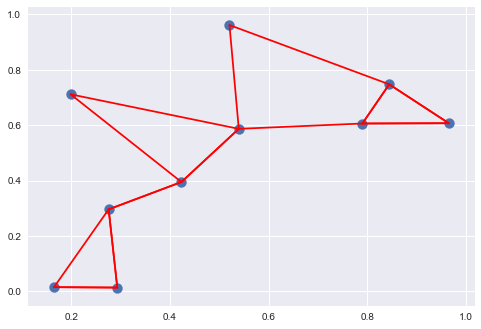

In [53]:
plt.scatter(X[:, 0], X[:, 1], s=100)

K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='red')

In [55]:
# structured arrays  
name = ['Alice', 'Bob', 'Charlie', 'Dave']
age = [25, 45, 37, 19]
weight= [44.0, 49.4, 99.1, 73.0]

data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                         'formats':('U10', 'i4', 'f8')})
data.dtype



dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [60]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data 

array([('Alice', 25,  44. ), ('Bob', 45,  49.4), ('Charlie', 37,  99.1),
       ('Dave', 19,  73. )], 
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [63]:
data[data['age'] < 30]['name']

array(['Alice', 'Dave'], 
      dtype='<U10')

In [65]:
# record arrays (like structured arrays, but fields can be accessed as attributes)
data_rec = data.view(np.recarray)
data_rec.age


array([25, 45, 37, 19], dtype=int32)